In [2]:
!conda install seaborn

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    conda-4.9.1                |   py36h06a4308_0         2.9 MB
    cycler-0.10.0              |           py36_0          13 KB
    dbus-1.13.18               |       hb2f20db_0         504 KB
    fontconfig-2.13.0          |       h9420a91_0         227 KB
    freetype-2.10.4            |       h5ab3b9f_0         596 KB
    glib-2.66.1                |       h92f7085_0         2.9 MB
    gst-plugins-base-1.14.0    |       hbbd80ab_1         4.8 MB
    gstreamer-1.14.0           |       hb31296c_0         3.1 MB
    jpeg-9b                    |       h024ee3a_2         214 KB
    kiwisolver-1.3.0           |   py36h2531618_0          80 KB
    lcms2-2.11   

In [3]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
img_20x_dir = "/data/20x_images"
img_40x_dir = "/data/40x_images"
img_60x_dir = "/data/60x_images"

In [ ]:
# Computing means

def compute_img_mean(img_dir, file_list):
    img_means = []
    img_x2_means = []
    
    for f in tqdm(file_list):
        f_path = os.path.join(img_dir, f)
        im = np.log(1 + cv2.imread(f_path, -1))#.astype("int64"))
        img_means.append(im.mean())
        img_x2_means.append(np.power(im, 2).mean())
        img_max = im.max()
    
    return np.array(img_means), np.array(img_x2_means), np.array(img_max)

def compute_data_stats(img_dir):
    c01_files = [f for f in os.listdir(img_dir) if "C01.tif" in f]
    c02_files = [f for f in os.listdir(img_dir) if "C02.tif" in f]
    c03_files = [f for f in os.listdir(img_dir) if "C03.tif" in f]
    c04_files = [f for f in os.listdir(img_dir) if "C04.tif" in f]
    
    img_c01_means, img_c01_x2_means, img_c01_max = compute_img_mean(img_dir, c01_files)
    img_c02_means, img_c02_x2_means, img_c02_max = compute_img_mean(img_dir, c02_files)
    img_c03_means, img_c03_x2_means, img_c03_max = compute_img_mean(img_dir, c03_files)
    img_c04_means, img_c04_x2_means, img_c04_max = compute_img_mean(img_dir, c04_files)
    
    img_c01_max = np.max(img_c01_max)
    img_c02_max = np.max(img_c02_max)
    img_c03_max = np.max(img_c03_max)
    img_c04_max = np.max(img_c04_max)
    
    img_c01_mean = np.mean(img_c01_means)
    img_c02_mean = np.mean(img_c02_means)
    img_c03_mean = np.mean(img_c03_means)
    img_c04_mean = np.mean(img_c04_means)
    
    img_c01_std = np.sqrt(np.mean(img_c01_x2_means) - np.power(img_c01_mean, 2))
    img_c02_std = np.sqrt(np.mean(img_c02_x2_means) - np.power(img_c02_mean, 2))
    img_c03_std = np.sqrt(np.mean(img_c03_x2_means) - np.power(img_c03_mean, 2))
    img_c04_std = np.sqrt(np.mean(img_c04_x2_means) - np.power(img_c04_mean, 2))
    
    return {"C01_mean": img_c01_mean, "C02_mean": img_c02_mean, 
            "C03_mean": img_c03_mean, "C04_mean": img_c04_mean, 
            "C01_std": img_c01_std, "C02_std": img_c02_std, 
            "C03_std": img_c03_std, "C04_std": img_c04_std, 
            "C01_max": img_c01_max, "C02_max": img_c02_max, 
            "C03_max": img_c03_max, "C04_max": img_c04_max}

In [183]:
mean_20x = compute_data_stats(img_20x_dir)
mean_40x = compute_data_stats(img_40x_dir)
mean_60x = compute_data_stats(img_60x_dir)

  4%|▍         | 2/48 [00:00<00:04, 10.23it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
100%|██████████| 336/336 [00:31<00:00, 10.62it/s]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in subtract
100%|██████████| 672/672 [01:03<00:00, 10.59it/s]


In [184]:
mean_20x

{'C01_mean': 5.623171,
 'C02_mean': 5.803633,
 'C03_mean': -inf,
 'C04_mean': 7.791895,
 'C01_std': 0.832914496723752,
 'C02_std': 1.6186590452079734,
 'C03_std': nan,
 'C04_std': 0.3838034205381966,
 'C01_max': 9.644069,
 'C02_max': 8.029433,
 'C03_max': 9.882417,
 'C04_max': 9.526391}

In [185]:
mean_40x

{'C01_mean': 5.449697,
 'C02_mean': 5.699868,
 'C03_mean': 5.88375,
 'C04_mean': 6.4944577,
 'C01_std': 0.8791591399102708,
 'C02_std': 1.6320837767247105,
 'C03_std': 0.37452854924188844,
 'C04_std': 0.4014103001215744,
 'C01_max': 8.875008,
 'C02_max': 7.7070627,
 'C03_max': 10.290619,
 'C04_max': 8.123261}

In [186]:
mean_60x

{'C01_mean': 5.2271276,
 'C02_mean': 6.3908257,
 'C03_mean': 5.693432,
 'C04_mean': 6.174559,
 'C01_std': 0.8781855707662108,
 'C02_std': 1.5189441649781834,
 'C03_std': 0.39499822962228637,
 'C04_std': 0.43658237811183315,
 'C01_max': 8.593598,
 'C02_max': 8.31189,
 'C03_max': 7.527256,
 'C04_max': 8.075272}

In [159]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

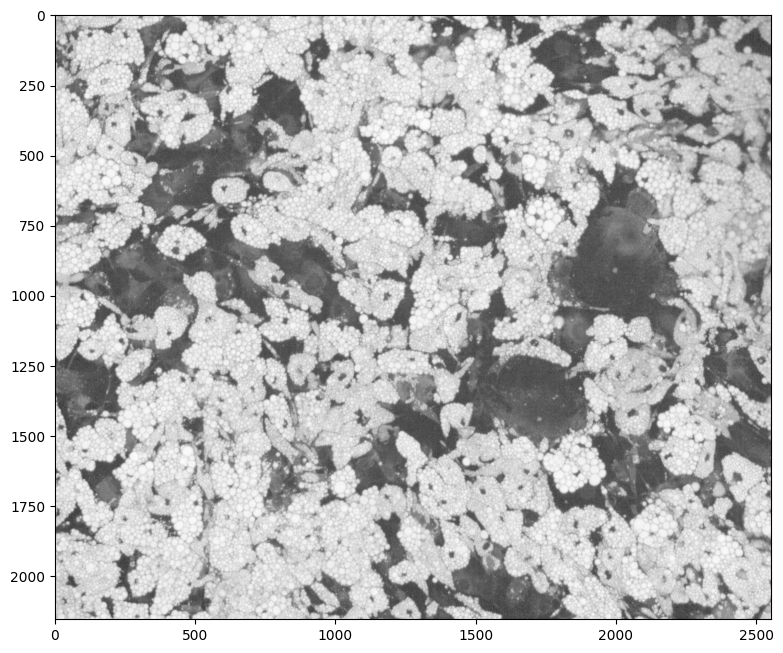

In [161]:
plt.imshow((np.log(1+cv2.imread(os.path.join(img_dir, c02_files[0]), -1).astype("int64")))/11, cmap="gray")

In [180]:
np.log(1+cv2.imread(os.path.join(img_dir, c01_files[0]), -1).astype("int64")).max()

9.525443040003957

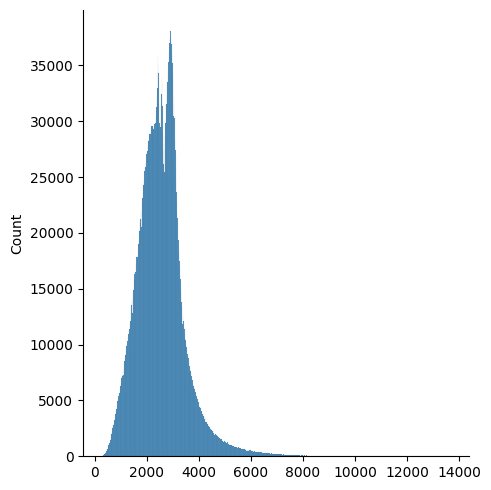

In [174]:
sns.displot(cv2.imread(os.path.join(img_dir, c01_files[0]), -1).astype("int64").ravel())